# Classification Comparison Project  
By: Avinash Bisram

This project aims to juxtapose the intuition and implementation of various supervised classification ML models and find the most accurate one in relation to the goal of classifying labeled data.

It contains the following sections...  
1. Data Selection
2. Initial Data Exploration
3. Data Cleaning
4. Exploratory Data Analysis
5. Machine Learning Intuition
6. Preprocessing
7. Model Creation and Training
8. Model Evaluation
9. Best Model Selection and Dataset Insights
10. Model Generalization
11. Model Productionization
12. Next Steps

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

## Data Selection

The data that will be used in this project is the "Mushroom Classification" dataset by UCI Machine Learning. It was downloaded from Kaggle [here](https://www.kaggle.com/datasets/uciml/mushroom-classification), and can be found in this project's repository as "mushrooms.csv".  
It contains information about mushrooms as well as labels for each record indicating if the mushroom is edible or poisonous.

Attribute Information:
- (TARGET) classes: edible=e, poisonous=p
- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
- bruises: bruises=t,no=f
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
- gill-attachment: attached=a,descending=d,free=f,notched=n
- gill-spacing: close=c,crowded=w,distant=d
- gill-size: broad=b,narrow=n
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
- stalk-shape: enlarging=e,tapering=t
- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- veil-type: partial=p,universal=u
- veil-color: brown=n,orange=o,white=w,yellow=y
- ring-number: none=n,one=o,two=t
- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [3]:
# Storing the dataset in a DataFrame

rawData = pd.read_csv('mushrooms.csv')

## Initial Data Exploration

In [4]:
# Viewing the head of the DataFrame to get a general idea of how it looks

rawData.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
# Dataset Shape

rawData.shape

# 8124 Observations (rows), 23 Features (columns)

(8124, 23)

In [6]:
# Column Names

rawData.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [7]:
# Column Datatypes

rawData.dtypes

# All feature data types seem to be in line with what we expect based on the Attribute Information above.

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [8]:
# Descriptive Statistics

# Since all of our features are categorical and non-numeric, it is not appropriate to view descriptive statistics
# right now.

# rawData.describe()

In [9]:
# Identifying Missing data

rawData.isnull().sum().sort_values()

# It looks like none of our features contain missing data.

class                       0
spore-print-color           0
ring-type                   0
ring-number                 0
veil-color                  0
veil-type                   0
stalk-color-below-ring      0
stalk-color-above-ring      0
stalk-surface-below-ring    0
stalk-surface-above-ring    0
population                  0
stalk-root                  0
gill-color                  0
gill-size                   0
gill-spacing                0
gill-attachment             0
odor                        0
bruises                     0
cap-color                   0
cap-surface                 0
cap-shape                   0
stalk-shape                 0
habitat                     0
dtype: int64

In [10]:
# Identifying Duplicate Records

rawData.duplicated().sum()

# It appears that we do not have any duplicate records in this dataset either.

0

In [11]:
# A method call that displays column names, indirect null counts, and feature data types

rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## Data Cleaning

In [12]:
# We saw above that our dataset has...
    # No missing values
    # No duplicate records
    # Appropriate feature datatypes

# The last consideration we need to make is whether any features contain typos (multiple strings being used to refer to the
# same category). We will check each feature for this now.

In [13]:
print("Feature\t| Unique Values\n")
for column in rawData.columns:
    print(f"{column}\t{sorted(rawData[column].unique())}")
    
# There does not appear to be any typos when comparing this list of values with the Attribute Information of the source.

Feature	| Unique Values

class	['e', 'p']
cap-shape	['b', 'c', 'f', 'k', 's', 'x']
cap-surface	['f', 'g', 's', 'y']
cap-color	['b', 'c', 'e', 'g', 'n', 'p', 'r', 'u', 'w', 'y']
bruises	['f', 't']
odor	['a', 'c', 'f', 'l', 'm', 'n', 'p', 's', 'y']
gill-attachment	['a', 'f']
gill-spacing	['c', 'w']
gill-size	['b', 'n']
gill-color	['b', 'e', 'g', 'h', 'k', 'n', 'o', 'p', 'r', 'u', 'w', 'y']
stalk-shape	['e', 't']
stalk-root	['?', 'b', 'c', 'e', 'r']
stalk-surface-above-ring	['f', 'k', 's', 'y']
stalk-surface-below-ring	['f', 'k', 's', 'y']
stalk-color-above-ring	['b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y']
stalk-color-below-ring	['b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y']
veil-type	['p']
veil-color	['n', 'o', 'w', 'y']
ring-number	['n', 'o', 't']
ring-type	['e', 'f', 'l', 'n', 'p']
spore-print-color	['b', 'h', 'k', 'n', 'o', 'r', 'u', 'w', 'y']
population	['a', 'c', 'n', 's', 'v', 'y']
habitat	['d', 'g', 'l', 'm', 'p', 'u', 'w']


## Exploratory Data Analysis

As this data is completely categorical and non-numeric, in our EDA process we are going to visualize the distribution of each class within our dataset as a whole and in relation to our target feature ('class'). Our goals in this process are (1) understand the distribution and balance of values within each feature, and (2) gain insight on the distribution of our target variable within each feature (do values of one feature have predominantly poisonous mushrooms?).

### Count Plots of each Feature

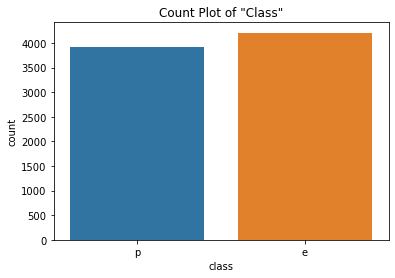

In [14]:
# 'Class' (our Target Feature)

sns.countplot(x=rawData['class'])
plt.title('Count Plot of "Class"')
plt.show()

# We can see that both distinct values in the 'class' feature have roughly the same count.
# This is good because if our target feature was unbalanced and had a large majority of one value over another,
# our Classification models could just identify most/all records as that majority value giving us a high accuracy
# but largely misclassifying records of the other category.

# Example, if our dataset had 99% dogs and 1% cats, our model could label everything as a dog and achieve 99% accuracy.
# However, it would be terrible at correctly identifying cats!

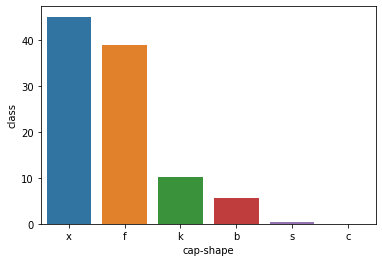

In [58]:
temp = round(rawData[['cap-shape','class']].groupby('cap-shape').agg('count').sort_values('class',ascending=False) / len(rawData) * 100,2)
sns.barplot(x=temp.index,y=temp['class']);

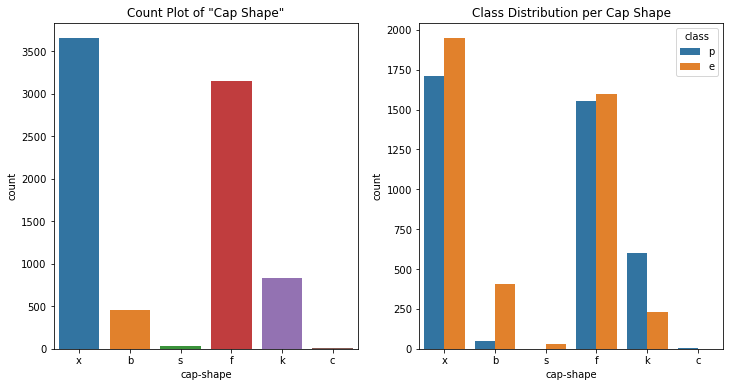

In [35]:
# 'Cap Shape'

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(x=rawData['cap-shape'])
plt.title('Count Plot of "Cap Shape"')

# This feature is quite unbalanced. The dataset is dominated by cap shapes of x and f (convex and flat respectively)
# but has very few records with values of s or c (conical and sunken respectively).

# Perhaps even our best model won't do a great job at properly classifying mushrooms with those sparse cap shape values.

plt.subplot(1,2,2)
sns.countplot(data=rawData, x='cap-shape', hue='class')
plt.title("Class Distribution per Cap Shape")
plt.legend(title='class', loc=('upper right'), bbox_to_anchor=(1,1))

plt.show()

'''
Note: produce a table that shows the percentage of each cap shape as a percentage of the whole AND the breakdown of class
within each cap shape value.
'''

In [25]:
# Let's take a quick look at the value counts for Cap Shape

rawData['cap-shape'].value_counts() / len(rawData['cap-shape']) * 100

# It looks like the sunken and conical cap shapes make up less than 1% of our data.

x    45.002462
f    38.798621
k    10.192024
b     5.563762
s     0.393895
c     0.049237
Name: cap-shape, dtype: float64

In [69]:
rawData[['cap-shape','class']].groupby(['cap-shape','class']).value_counts()

cap-shape  class
b          e         404
           p          48
c          p           4
f          e        1596
           p        1556
k          e         228
           p         600
s          e          32
x          e        1948
           p        1708
dtype: int64

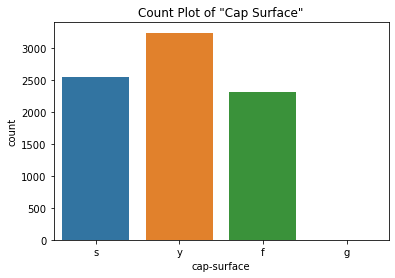

In [20]:
# 'Cap Surface'

sns.countplot(x=rawData['cap-surface'])
plt.title('Count Plot of "Cap Surface"')
plt.show()

# This feature is mostly uniform but has little to no values for 'cap-surface'='g' (grooves).

In [27]:
# Comparing the value counts (in relative percentage) for Cap Surface

rawData['cap-surface'].value_counts() / len(rawData['cap-surface']) * 100

# We can see that mushrooms having grooved cap surfaces make up 0.04% of our data so our models probably won't get much
# information from that quality.

y    39.931068
s    31.462334
f    28.557361
g     0.049237
Name: cap-surface, dtype: float64

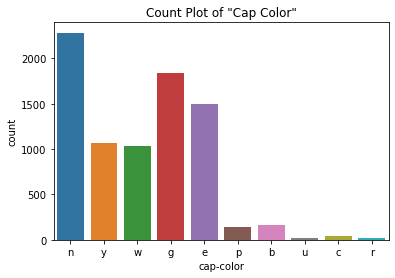

In [28]:
# 'Cap Color'

sns.countplot(x=rawData['cap-color'])
plt.title('Count Plot of "Cap Color"')
plt.show()

# This feature isn't very uniform. We have quite a few values with very little appearance in our dataset.

In [29]:
rawData['cap-color'].value_counts() / len(rawData['cap-surface']) * 100

n    28.114229
g    22.648941
e    18.463811
y    13.195470
w    12.801576
b     2.067947
p     1.772526
c     0.541605
u     0.196947
r     0.196947
Name: cap-color, dtype: float64

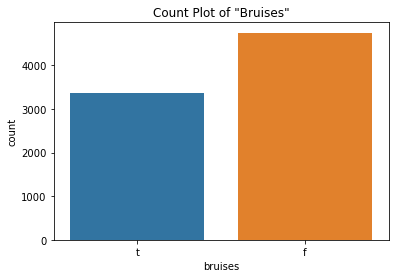

In [30]:
# 'Bruises'

sns.countplot(x=rawData['bruises'])
plt.title('Count Plot of "Bruises"')
plt.show()

# This feature isn't necessarily uniform but there isn't a huge disparity in value counts like some of the other 
# features.

In [31]:
rawData['bruises'].value_counts() / len(rawData['bruises']) * 100

# Only a 17% difference in value counts. This feature should hold some value in our final model.

f    58.444116
t    41.555884
Name: bruises, dtype: float64

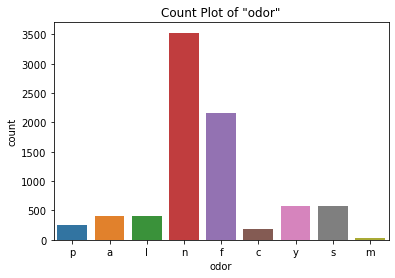

In [32]:
# 'Odor'

sns.countplot(x=rawData['odor'])
plt.title('Count Plot of "odor"')
plt.show()

# 

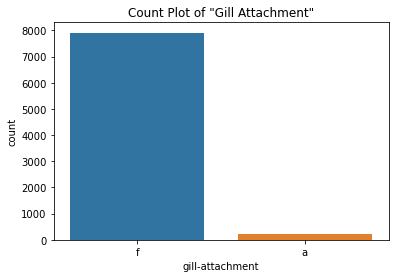

In [33]:
# 'Gill Attachment'

sns.countplot(x=rawData['gill-attachment'])
plt.title('Count Plot of "Gill Attachment"')
plt.show()

# 

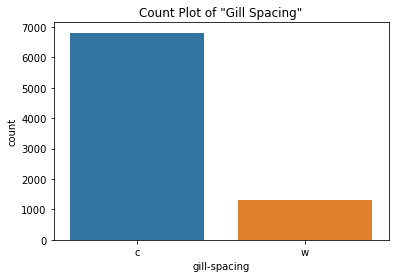

In [34]:
# 'Gill Spacing'

sns.countplot(x=rawData['gill-spacing'])
plt.title('Count Plot of "Gill Spacing"')
plt.show()

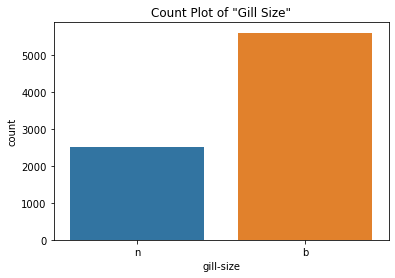

In [35]:
# 'Gill Size'

sns.countplot(x=rawData['gill-size'])
plt.title('Count Plot of "Gill Size"')
plt.show()

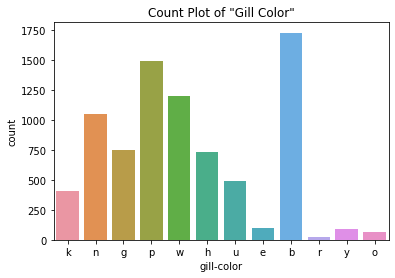

In [36]:
# 'Gill Color'

sns.countplot(x=rawData['gill-color'])
plt.title('Count Plot of "Gill Color"')
plt.show()

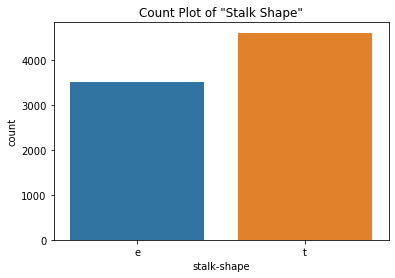

In [37]:
# 'Stalk Shape'

sns.countplot(x=rawData['stalk-shape'])
plt.title('Count Plot of "Stalk Shape"')
plt.show()

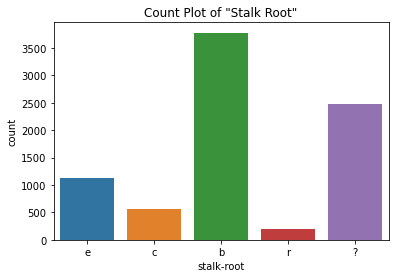

In [39]:
# 'Stalk Root'

sns.countplot(x=rawData['stalk-root'])
plt.title('Count Plot of "Stalk Root"')
plt.show()

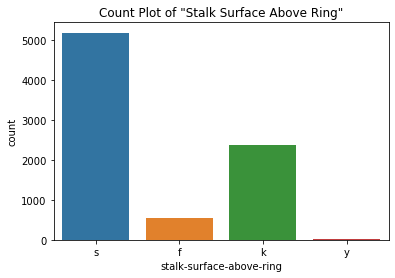

In [40]:
# 'Stalk Surface Above Ring'

sns.countplot(x=rawData['stalk-surface-above-ring'])
plt.title('Count Plot of "Stalk Surface Above Ring"')
plt.show()

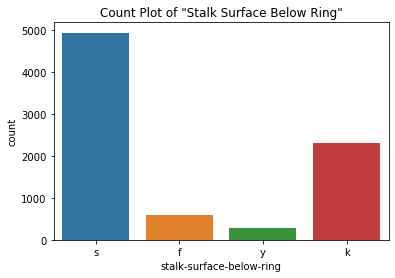

In [41]:
# 'Stalk Surface Below Ring'

sns.countplot(x=rawData['stalk-surface-below-ring'])
plt.title('Count Plot of "Stalk Surface Below Ring"')
plt.show()

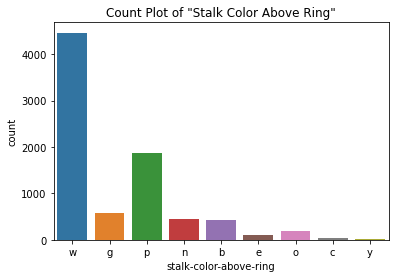

In [42]:
# 'Stalk Color Above Ring'

sns.countplot(x=rawData['stalk-color-above-ring'])
plt.title('Count Plot of "Stalk Color Above Ring"')
plt.show()

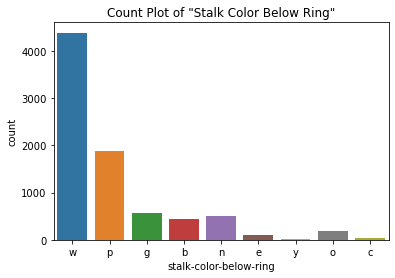

In [43]:
# 'Stalk Color Below Ring'

sns.countplot(x=rawData['stalk-color-below-ring'])
plt.title('Count Plot of "Stalk Color Below Ring"')
plt.show()

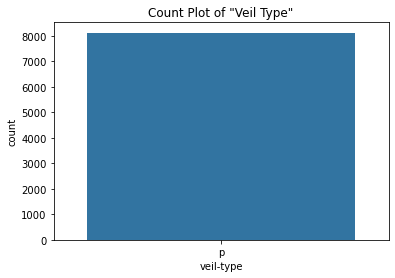

In [44]:
# 'Veil Type'

sns.countplot(x=rawData['veil-type'])
plt.title('Count Plot of "Veil Type"')
plt.show()

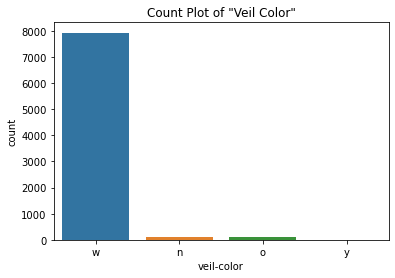

In [46]:
# 'Veil Color'

sns.countplot(x=rawData['veil-color'])
plt.title('Count Plot of "Veil Color"')
plt.show()

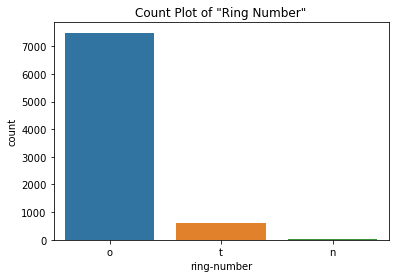

In [47]:
# 'Ring Number'

sns.countplot(x=rawData['ring-number'])
plt.title('Count Plot of "Ring Number"')
plt.show()

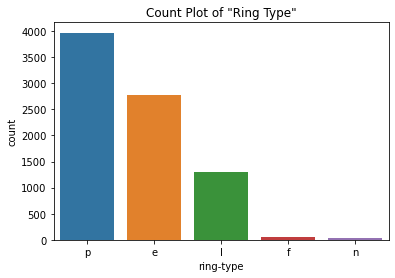

In [48]:
# 'Ring Type'

sns.countplot(x=rawData['ring-type'])
plt.title('Count Plot of "Ring Type"')
plt.show()

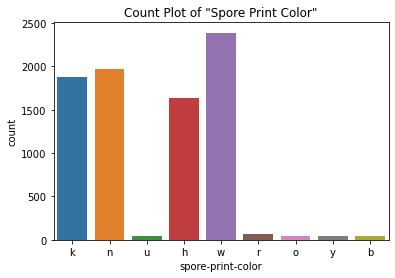

In [49]:
# 'Spore Print Color'

sns.countplot(x=rawData['spore-print-color'])
plt.title('Count Plot of "Spore Print Color"')
plt.show()

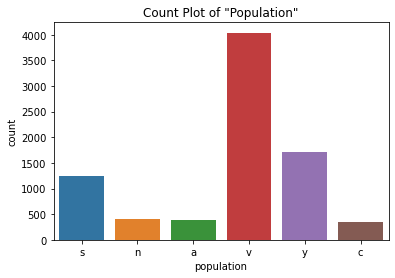

In [50]:
# 'Population'

sns.countplot(x=rawData['population'])
plt.title('Count Plot of "Population"')
plt.show()

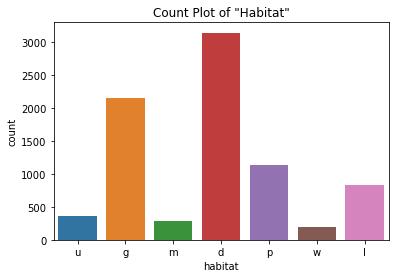

In [51]:
# 'Habitat'

sns.countplot(x=rawData['habitat'])
plt.title('Count Plot of "Habitat"')
plt.show()

### Each Feature vs. Target Feature

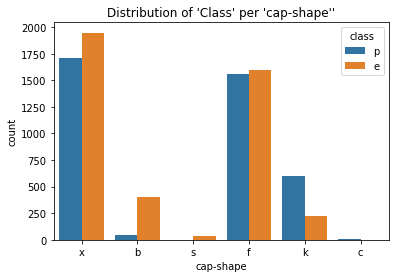

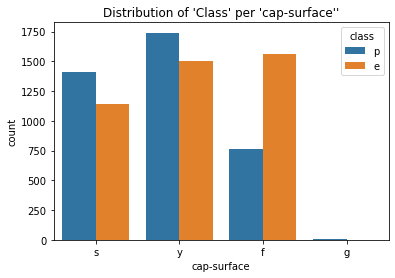

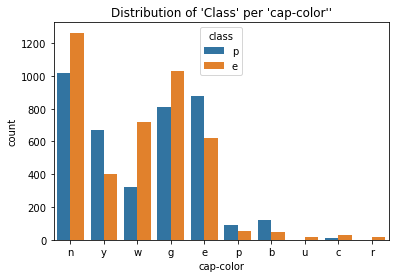

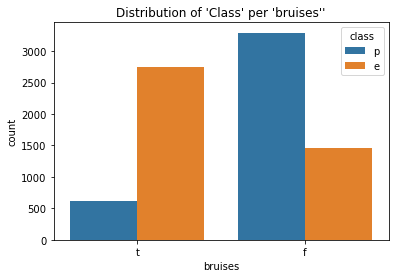

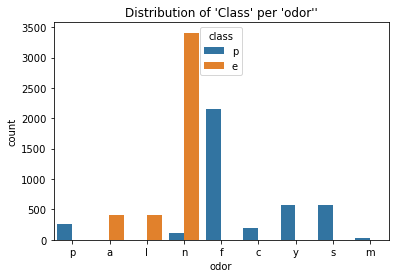

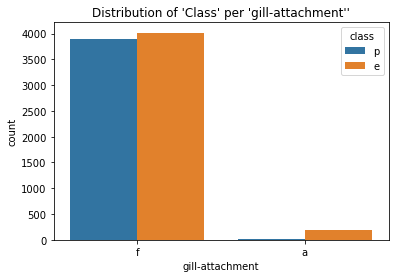

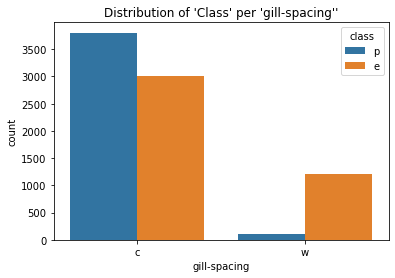

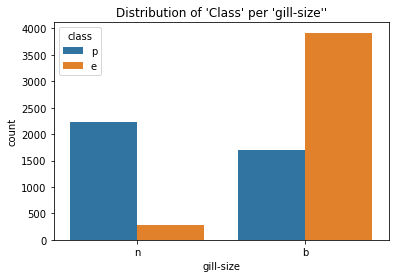

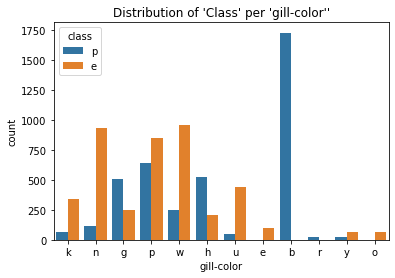

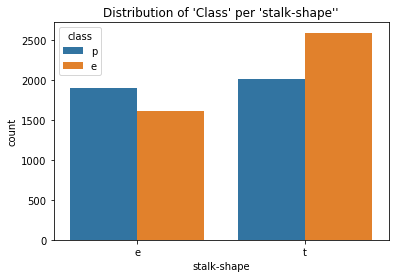

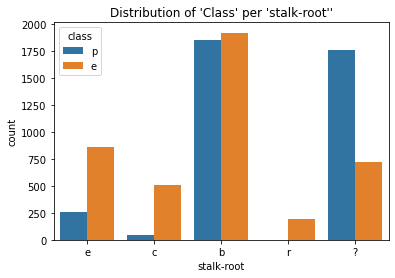

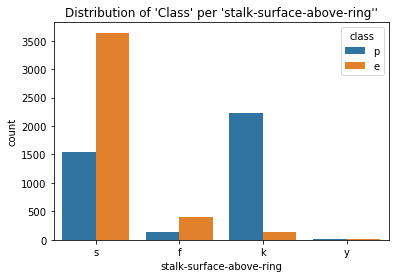

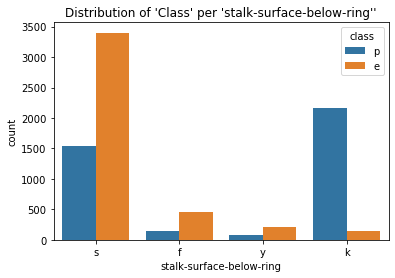

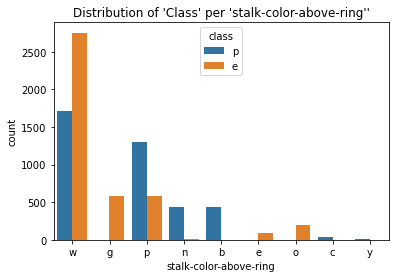

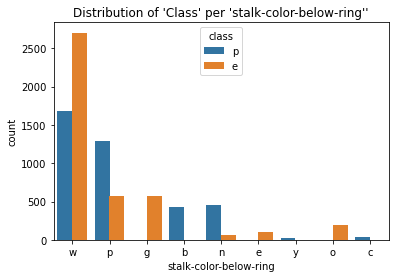

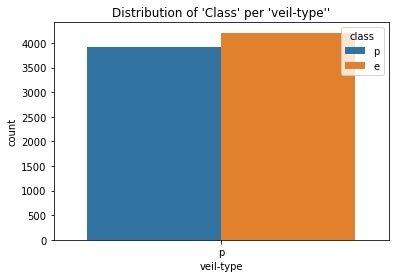

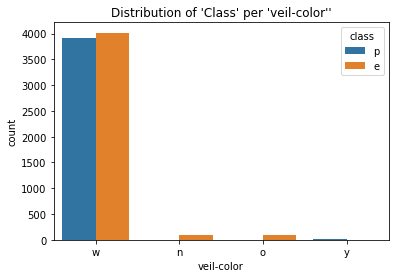

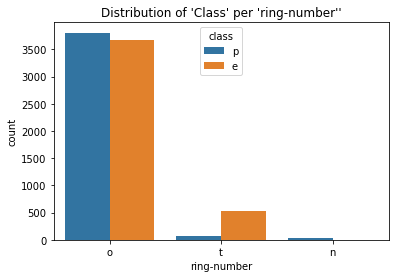

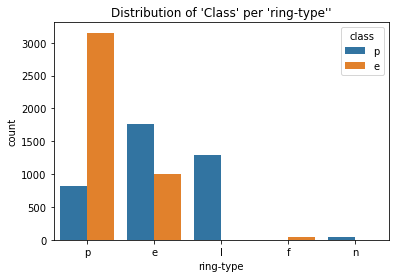

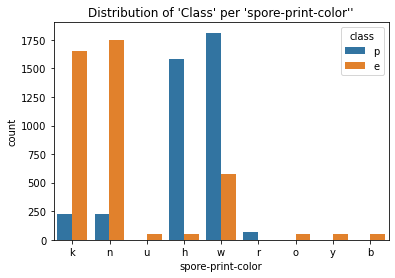

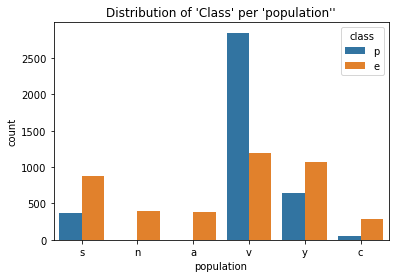

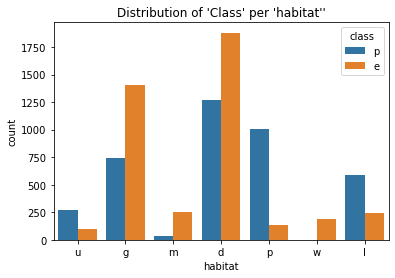

In [58]:
for column in rawData.columns[1:]:
    sns.countplot(data=rawData, x=column, hue='class')
    plt.title(f"Distribution of 'Class' per '{column}''")
    plt.show()

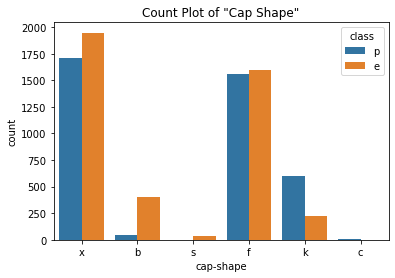

In [55]:
sns.countplot(data=rawData, x='cap-shape', hue='class')
plt.title('Count Plot of "Cap Shape"')
plt.show()

## Machine Learning Intuition

Now that we have verified that the dataset is "clean" (no missing values, no duplicates, no typos, etc.), and have explored the distributions and relationships between them, it is time to think about how we should solve our problem of correctly predicting whether new mushrooms with certain attributes are poisonous or edible.  

Since we are trying to predict which distinct category a new mushroom belongs to (being edible or poisonous), this is a Classification task.  

Furthermore, since the attribute we are trying to predict has TWO categories, this is a Binary Classification task (compared to a multiclass problem).

Lastly, since all of our observations have an existing category assigned to them, they are all 'labeled', meaning we are dealing with a Supervised machine learning task. Therefore, we can summarize our task as being Supervised Binary Classification.

Now that we know the task we are trying to solve, we can think about which machine learning models we want to use. There are many popular Supervised Classification ML models that have various benefits and drawbacks. This project will give us an opportunity to compare a few of them and see which one performs the best with our data.

The machine learning models we will be comparing in this project are:
- Logistic Regression
- K Nearest Neighbors Classifer
- Support Vector Machine Classifier
- Naive Bayes Classifer
- Single Decision Tree  

and a few Ensemble methods that build on Decision Trees including:
- Random Forest Classifer
- AdaBoost Classifer
- Gradient Boost Classifer

**Note:** We will save Neural Networks for a separate project!

## Preprocessing

## Model Creation and Training

## Model Evaluation

## Best Model Selection and Dataset Insights

## Model Generalization

## Model Productionization

## Next Steps